##Titanic Sinking Analysis for Kaggle Competition

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy as sp
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

In [4]:
%matplotlib inline

##Data Handling


In [5]:
df = pd.read_csv('data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Take Care of Missing Values

In [7]:
#Drop features with not enough observations
df = df.drop('Cabin', axis=1) #axis=1 refers to the columns

#remove NaN values
df = df.dropna()

##Graphical Look At Our Data

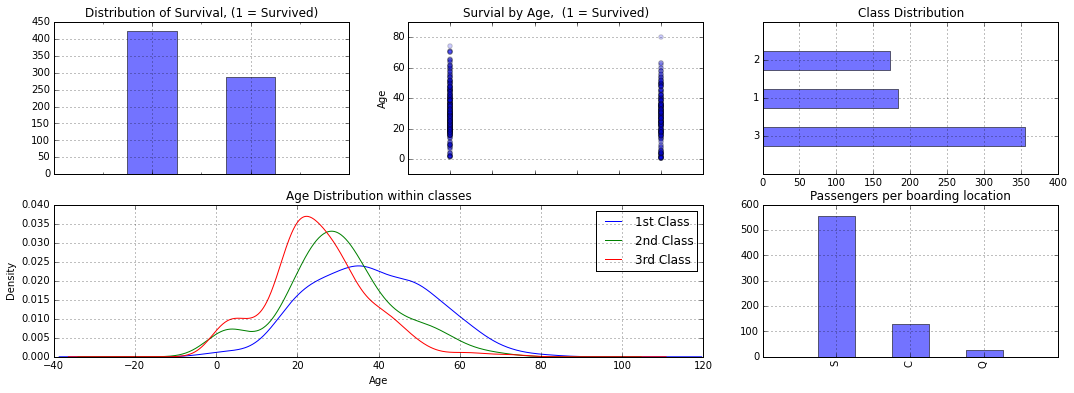

In [8]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survial by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Need to understand more about who survived and who died

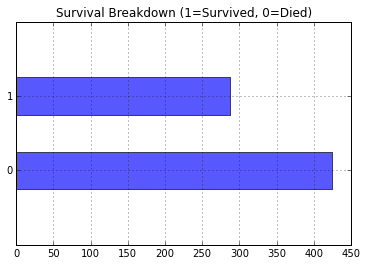

In [9]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color='blue', alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts()))
plt.title('Survival Breakdown (1=Survived, 0=Died)')

##Survival Breakdown By Gender

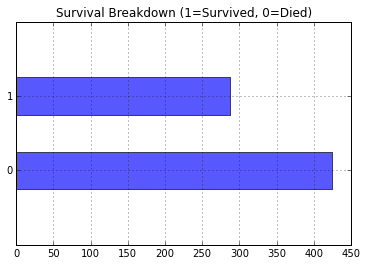

In [10]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color='blue', alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts()))
plt.title('Survival Breakdown (1=Survived, 0=Died)')


###All Women vs All Men Survival

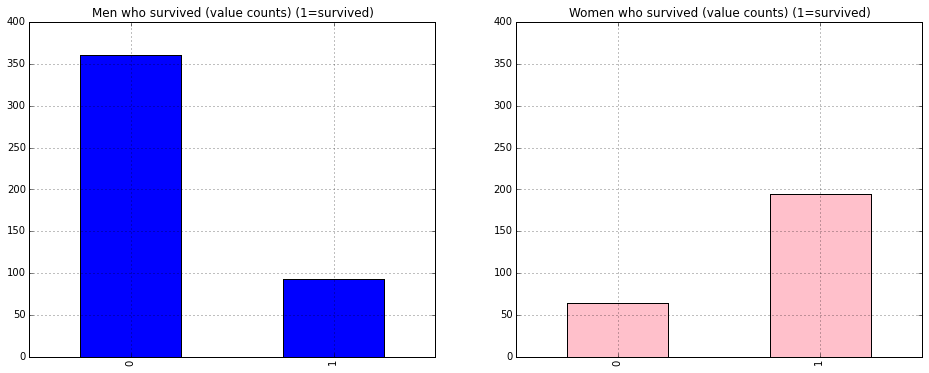

In [11]:

genderFigure = plt.figure(figsize=(16,6))

maleAxes = genderFigure.add_subplot(1,2,1)
plt.title('Men who survived (value counts) (1=survived)')
maleSurvivalCounts = df.Survived[df.Sex=='male'].value_counts()
maleSurvivalCounts.plot(kind='bar', color='blue')

femaleAxes = genderFigure.add_subplot(1,2,2, sharey=maleAxes)
femaleSurvivalCounts = df.Survived[df.Sex=='female'].value_counts()
femaleSurvivalCounts.sort(0)
femaleSurvivalCounts.plot(kind='bar', color='pink')
plt.title('Women who survived (value counts) (1=survived)')


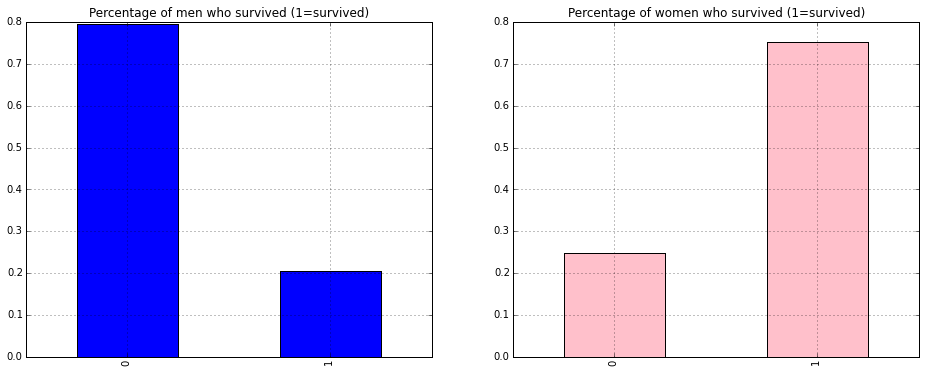

In [12]:
genderPercentagesFigure = plt.figure(figsize=(16,6))
malePercentagesAx = genderPercentagesFigure.add_subplot(1,2,1)
malePercentagesAx.set_ylim(0.0, 1.0)
totalMen = len(df.Survived[df.Sex=='male'])
maleSurvivalCount = df.Survived[df.Sex=='male'].value_counts()
maleSurvivalPercentages = maleSurvivalCount / totalMen
maleSurvivalPercentages.plot(kind='bar', color='blue')
plt.title('Percentage of men who survived (1=survived)')

femalePercentagesAx = genderPercentagesFigure.add_subplot(1,2,2, sharey = malePercentagesAx)
totalWomen = len(df.Survived[df.Sex=='female'])
femaleSurvivalCount = df.Survived[df.Sex=='female'].value_counts()
femaleSurvivalCount.sort(0)
femaleSurvivalPercentages = femaleSurvivalCount / totalWomen
femaleSurvivalPercentages.plot(kind='bar', color='pink')
plt.title('Percentage of women who survived (1=survived)')

###Gender Survival Broken Down Into Passenger Classes


In [13]:
#First get the 3 passenger classes
upperClass = df[df['Pclass']==1]
middleClass = df[df['Pclass']==2]
lowerClass = df[df['Pclass']==3]

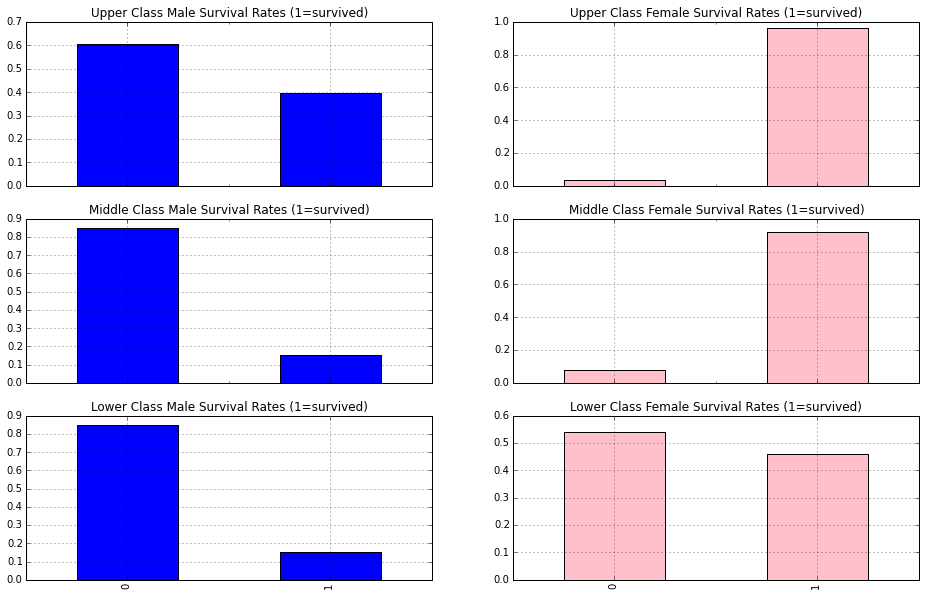

In [14]:
#Make graphs for 3 passenger classes

##Upper Class##
classGenderFigure = plt.figure(figsize=(16,10))
upperClassMaleAx = classGenderFigure.add_subplot(3,2,1)
maleUpperClassCount = len(upperClass[upperClass.Sex=='male'])
maleUpperMask = upperClass.Sex =='male'
maleUpperClass = upperClass.Survived[maleUpperMask].value_counts()
maleUpperClassSurvivalPercentages = maleUpperClass / maleUpperClassCount
maleUpperClassSurvivalPercentages.plot(kind='bar')
plt.title('Upper Class Male Survival Rates (1=survived)')

upperClassFemaleAx = classGenderFigure.add_subplot(3,2,2)
femaleUpperClassCount = len(upperClass[upperClass.Sex=='female'])
femaleUpperMask = upperClass.Sex == 'female'
femaleUpperClass = upperClass.Survived[femaleUpperMask].value_counts()
femaleUpperClass.sort()
femaleUpperClassSurvivalPercentages = femaleUpperClass / femaleUpperClassCount
femaleUpperClassSurvivalPercentages.plot(kind='bar', color='pink')
plt.title('Upper Class Female Survival Rates (1=survived)')

##Middle Clas##
middleClasMaleAx = classGenderFigure.add_subplot(3,2,3)
maleMiddleClassCount = len(middleClass[middleClass.Sex =='male'])
maleMiddleMask = middleClass.Sex == 'male'
maleMiddleClass = middleClass.Survived[maleMiddleMask].value_counts()
maleMiddleClassSurvivalPercentages = maleMiddleClass / maleMiddleClassCount
maleMiddleClassSurvivalPercentages.plot(kind='bar', color='blue')
plt.title('Middle Class Male Survival Rates (1=survived)')

middleClasFemaleAx = classGenderFigure.add_subplot(3,2,4)
femaleMiddleClassCount = len(middleClass[middleClass.Sex =='female'])
femaleMiddleMask = middleClass.Sex == 'female'
femaleMiddleClass = middleClass.Survived[femaleMiddleMask].value_counts()
femaleMiddleClass.sort(0)
femaleMiddleClassSurvivalPercentages = femaleMiddleClass / femaleMiddleClassCount
femaleMiddleClassSurvivalPercentages.plot(kind='bar', color='pink')
plt.title('Middle Class Female Survival Rates (1=survived)')

##Lower Class##
lowerClassMaleAx = classGenderFigure.add_subplot(3,2,5)
maleLowerClassCount = len(lowerClass[lowerClass.Sex=='male'])
maleLowerMask = lowerClass.Sex =='male'
maleLowerClass = lowerClass.Survived[maleLowerMask].value_counts()
maleLowerClassSurvivalPercentages = maleLowerClass / maleLowerClassCount
maleLowerClassSurvivalPercentages.plot(kind='bar', color='blue')
plt.title('Lower Class Male Survival Rates (1=survived)')

lowerClassFemaleAx = classGenderFigure.add_subplot(3,2,6)
femaleLowerClassCount = len(lowerClass[lowerClass.Sex=='female'])
femaleLowerMask = lowerClass.Sex =='female'
femaleLowerClass = lowerClass.Survived[femaleLowerMask].value_counts()
femaleLowerClassSurvivalPercentages = femaleLowerClass / femaleLowerClassCount
femaleLowerClassSurvivalPercentages.plot(kind='bar', color='pink')
plt.title('Lower Class Female Survival Rates (1=survived)')


##Identify Families/Traveling Groups and Analyze Survival Rates###


In [15]:
ticketGrouping = df.groupby(df['Ticket'])
ticketGroupingSurvivalData = ticketGrouping['Survived'].agg([np.sum, len])
ticketGroupingSurvivalData['percentLived'] = ticketGroupingSurvivalData['sum'] / ticketGroupingSurvivalData['len']

In [16]:
ticketGroupingSurvivalGroupSizes = ticketGroupingSurvivalData.groupby('len')
ticketGroupingSurvivalGroupSizes.describe()

percentLived         sum
len                                
1   count    431.000000  431.000000
    mean       0.320186    0.320186
    std        0.467090    0.467090
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        1.000000    1.000000
    max        1.000000    1.000000
2   count     75.000000   75.000000
    mean       0.566667    1.133333
    std        0.397061    0.794123
    min        0.000000    0.000000
    25%        0.250000    0.500000
    50%        0.500000    1.000000
    75%        1.000000    2.000000
    max        1.000000    2.000000
3   count     20.000000   20.000000
    mean       0.766667    2.300000
    std        0.244232    0.732695
    min        0.000000    0.000000
    25%        0.666667    2.000000
    50%        0.666667    2.000000
    75%        1.000000    3.000000
    max        1.000000    3.000000
4   count      9.000000    9.000000
    mean       0.527778    2.111111
    std        0.384148    1.536591
    min        0.000000    0.000000
    25%        0.250000    1.000000
    50%        0.500000    2.000000
    75%        0.750000    3.000000
    max        1.000000    4.000000
5   count      2.000000    2.000000
    mean       0.000000    0.000000
    std        0.000000    0.000000
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        0.000000    0.000000
    max        0.000000    0.000000
6   count      3.000000    3.000000
    mean       0.000000    0.000000
    std        0.000000    0.000000
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        0.000000    0.000000
    max        0.000000    0.000000
7   count      1.000000    1.000000
    mean       0.000000    0.000000
    std             NaN         NaN
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        0.000000    0.000000
    max        0.000000    0.000000

In [17]:
ticketGroupingSurvivalGroupSizesMean = ticketGroupingSurvivalGroupSizes['percentLived'].mean()

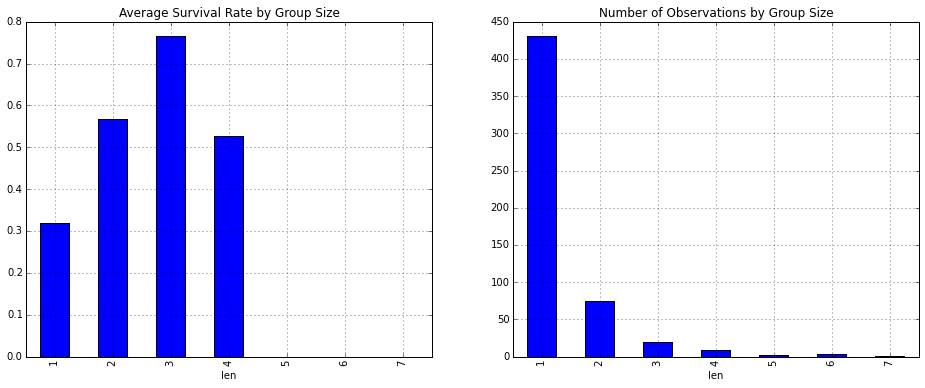

In [18]:
ticketGroupSurvivalFig = plt.figure(figsize=(16,6))
ticketGroupSurvivalAx1 = ticketGroupSurvivalFig.add_subplot(1,2,1)
ticketGroupingSurvivalGroupSizesMean.plot(kind='bar')
plt.title('Average Survival Rate by Group Size')
ticketGroupSurvivalAx2 = ticketGroupSurvivalFig.add_subplot(1,2,2)
ticketGroupingSurvivalGroupSizes['percentLived'].count().plot( kind='bar')
plt.title('Number of Observations by Group Size')

The only group sizes we can use are size one and two

##Machine Learning Analysis

###Technique 1: Logistic Regression
Logistic Regression will calculate the survival likelihood cutoff

In [19]:
#Model Formula
logisticRegressionFormula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'
#results dict to hold regression results
results = {}

In [20]:
#Make regresion friendly dataframe
y,x = dmatrices(logisticRegressionFormula, data=df, return_type = 'dataframe') 

In [21]:
#Instantiate our logitistic regression model
model = sm.Logit(y,x)

In [22]:
#Fit Model to training data
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


In [23]:
#save results for outputting predictions later
results['Logit'] = [res, logisticRegressionFormula]
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Fri, 15 May 2015   Pseudo R-squ.:                  0.3414
Time:                        15:19:21   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000         3.613     5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000        -1.852    -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000        -3.078    -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000        -3.050    -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162        -2.006     0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116        -0.956     0.105
Age                 -0.0436      0.008     -5.264      0.000        -0.060    -0.027
SibSp               -0.3697      0.123     -3.004      0.003        -0.611    -0.129
====================================================================================
"""

Visualize Results

In [1]:
logitResultsFigure = plt.figure(figsize=(16,4))
logitResultsAx = logitResultsFigure.add_subplot(1,2,1, axisbg='#DBDBDB')
#generate predictions from logit model
survivalPredictions = res.predict(x)
logitResultsAx.plot(x.index, survivalPredictions, 'bo', x.index, y, 'r*', alpha=.25)
plt.title('Logistic Regression Predicted Values=Blue \nActual Values=Red')

logitResultsResidualsAx = logitResultsFigure.add_subplot(1,2,2, axisbg='#DBDBDB')
logitResultsResidualsAx.plot(res.resid_dev, 'r-')
logitResultsResidualsAx.set_xlim(-1,700)
plt.title('Logistic Regression Residuals')

NameError: name 'plt' is not defined

Analyze Logistic Regrssion Model Predictions

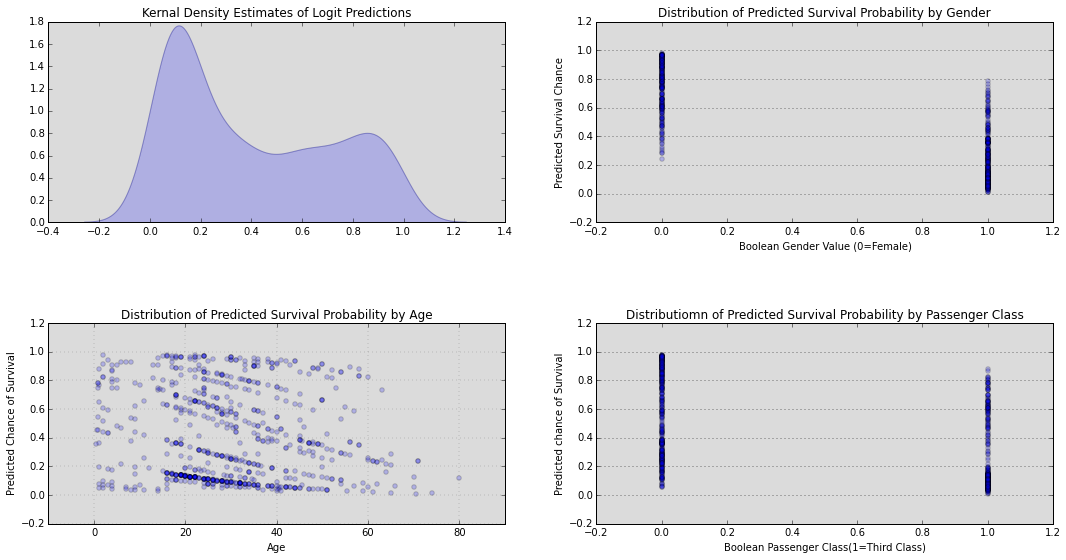

In [25]:
logitPredictionsFigure = plt.figure(figsize=(18,9), dpi=1600)
alpha = 0.2

logitPredictionsDistribAx = logitPredictionsFigure.add_subplot(2,2,1, axisbg='#DBDBDB')
kernalDensityEstimates = KDEUnivariate(res.predict())
kernalDensityEstimates.fit()
logitPredictionsDistribAx.plot(kernalDensityEstimates.support, kernalDensityEstimates.density,alpha=alpha)
logitPredictionsDistribAx.fill_between(kernalDensityEstimates.support, kernalDensityEstimates.density, alpha=alpha)
plt.title('Kernal Density Estimates of Logit Predictions')

logitPredictionsGenderAx = logitPredictionsFigure.add_subplot(2,2,2, axisbg='#DBDBDB')
logitPredictionsGenderAx.scatter(y=res.predict(), x=x['C(Sex)[T.male]'], alpha=alpha)
plt.grid(b=True, which='major', axis='y')
plt.ylabel('Predicted Survival Chance')
plt.xlabel('Boolean Gender Value (0=Female)')
plt.title('Distribution of Predicted Survival Probability by Gender')

logitPredictionsAgeAx = logitPredictionsFigure.add_subplot(2,2,3, axisbg='#DBDBDB')
logitPredictionsAgeAx.scatter(x=x['Age'], y=res.predict(), alpha=alpha)
plt.grid(True, linewidth=0.15)
plt.ylabel('Predicted Chance of Survival')
plt.xlabel('Age')
plt.title('Distribution of Predicted Survival Probability by Age')

logitPredictionsClassAx = logitPredictionsFigure.add_subplot(2,2,4, axisbg='#DBDBDB')
logitPredictionsClassAx.scatter(x=x['C(Pclass)[T.3]'], y=res.predict(), alpha=alpha)
plt.grid(True, which='major', axis='y')
plt.xlabel('Boolean Passenger Class(1=Third Class)')
plt.ylabel('Predicted chance of Survival')
plt.title('Distributiomn of Predicted Survival Probability by Passenger Class')

logitPredictionsFigure.subplots_adjust(hspace=0.5, wspace=0.2)


Use Model to predict test data

In [26]:
#import test_data
titanicTestData = pd.read_csv('data/test.csv')

In [27]:
titanicTestData

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [28]:
titanicTestData.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [29]:
#Need to add our prediction variable (Kaggle leaves it blank by default)
titanicTestData['Survived'] = 100

In [30]:
#Our saved Logit Mmodel
results

{'Logit': [<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x10b24ab90>,
  'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)']}

In [31]:
testTitanicy,testTitanicx = dmatrices(logisticRegressionFormula, data=titanicTestData, return_type = 'dataframe') 


In [32]:
titanicTestDataPredictions = res.predict(testTitanicx)
titanicTestDataResultPredictions = Series(titanicTestDataPredictions)

In [33]:
#Output results as CSV for submission
logitPredictionResults = titanicTestDataResultPredictions.to_csv('data/output/logitisticreg1.csv')

##Support Vector Machine (SVM)

In [34]:
#Create formula for SVM
svmFormula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

In [35]:
#Set up plotting parameters and color map
svmFigure = plt.figure(figsize=(8,6))
colorMap = plt.cm.RdBu_r

In [36]:
svmY, svmX = dmatrices(svmFormula, data=df, return_type='matrix') #makes nice matrix for regression

In [37]:
#Feature selection
featureOne = 2 #Passenger Class 3
featureTwo = 3 #Sex of passengers
modelX = np.asarray(svmX)
modelY = np.asarray(svmY)
modelY = modelY.flatten() #needs to be one dimensional
modelX = modelX[:,[featureOne, featureTwo]] #Gives us collumns 2 and 3

In [38]:
nSample = len(modelX) #Number of observations in our dataset
np.random.seed(0) #Random seed for random ordering
order = np.random.permutation(nSample) #makes a random array of nSample length (712 here)


In [39]:
modelX = modelX[order] #Essentially this has randomized our dataset for the SVM
modelY = modelY[order].astype(np.float) #get the randomized ordering for Y to, converted to float

In [40]:
#Perform cross validation (Train on subset of data and then test on the rest)
trainingSampleBound = int(0.9 * nSample)
trainingDataX = modelX[:trainingSampleBound]
trainingDataY = modelY[:trainingSampleBound]
testDataX = modelX[trainingSampleBound:]
testDataY = modelY[trainingSampleBound:]

In [41]:
#Create list of kernel types for analysis
kernelList = ['linear', 'rbf', 'poly']



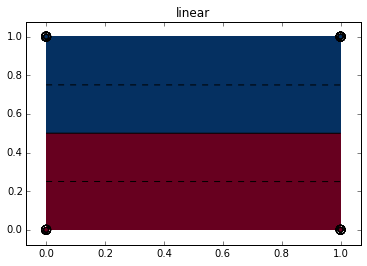

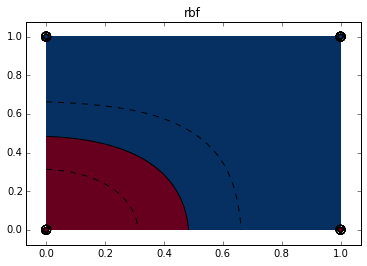

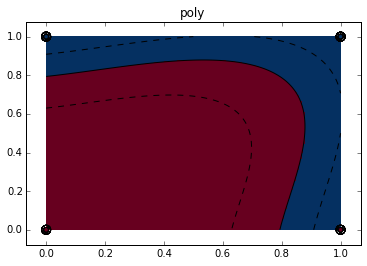

In [42]:
#Fit our model
for figureNumber, kernel in enumerate(kernelList):
    classifier = svm.SVC(kernel = kernel, gamma=3) #gamma is an internal SVM parameter (1/n is default)
    classifier.fit(trainingDataX, trainingDataY) #fit the svm with trainingdata
    
    plt.figure(figureNumber)
    #zorder means that this will be on top
    plt.scatter(modelX[:, 0], modelX[:,1 ], c=modelY, zorder=10, cmap=colorMap) 
    
    #circle out the test data (these are just the dots?)
    plt.scatter(testDataX[:, 0], testDataX[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    x_min = modelX[:, 0].min()
    x_max = modelX[:, 0].max()
    y_min = modelX[:, 1].min()
    y_max = modelX[:, 1].max()
    
    #eli.thegreenplace.ne search meshgrids to find out what it is!
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] 
    Z = classifier.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    
    # put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=colorMap)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles = ['--', '-', '--'], levels=[-.5, 0,.5])
    plt.title(kernel)
    plt.show()
    
    
    

In [43]:
testY, testX = dmatrices(svmFormula, data=titanicTestData, return_type='dataframe')

In [44]:
polyClassifier = svm.SVC(kernel='poly', gamma=3).fit(trainingDataX, trainingDataY)                                                            

svmResults = classifier.predict(x.ix[: , [2,3]])

In [45]:
svmResultsDF = DataFrame(svmResults, columns=['Survived'])

In [46]:
svmResultsDF.to_csv('data/output/svm_poly.csv')

###Random Forest

In [47]:
#import ensemble library from ske
import sklearn.ensemble as ske

#make random forest model and fit model to the training data
randomForestFormula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

randomForestY, randomForestX = dmatrices(randomForestFormula, data=df, return_type='dataframe')

In [2]:
randomForestX.describe()

NameError: name 'randomForestX' is not defined

In [49]:
#Convert Y data to 1 dimensional Numpy array (RandomForestClasssifer requires this)
randomForestY = np.asarray(randomForestY) #convert to an array
randomForestY = randomForestY.ravel() #flatten the array

In [50]:
#instantiate and fit our model
randomForestResults = ske.RandomForestClassifier(n_estimators=100).fit(X=randomForestX, y=randomForestY)

In [51]:
#Score the results
randomForestScore = randomForestResults.score(randomForestX, randomForestY)

In [52]:
randomForestScore

0.9452247191011236

##Cross-Validation with K-Folds

In [54]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
import logloss

In [55]:
crossValidationY, crossValidationX = dmatrices(randomForestFormula, data=df, return_type='dataframe')

In [56]:
#Using Random Forest Classifier
randomForestCFR = ske.RandomForestClassifier(n_estimators=100)

In [57]:
#K-folds Cross Validation with 5 folds
crossValidation = cross_validation.KFold(len(crossValidationX) , n_folds=5, indices=False)

/Users/Jslice/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:65: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


In [64]:
#Iterate through training and test cross validation segments
#run random forest classifier on each one, aggregating results into a list
results = []
actual = [0, 1, 1, 1, 1, 0, 0, 1, 0, 1]
pred = [0.24160452, 0.41107934, 0.37063768, 0.48732519, 0.88929869,
         0.60626423, 0.09678324, 0.38135864, 0.20463064, 0.21945892]
for trainingCrossValidation, testingCrossValidation in crossValidation:
    fittedModel = randomForestCFR.fit(crossValidationX[trainingCrossValidation], crossValidationY[trainingCrossValidation])
    predictedProbas = fittedModel.predict_proba(crossValidationX[testingCrossValidation])
    print(predictedProbas[0])


    

/Users/Jslice/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/Jslice/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[ 0.46  0.54]
[ 1.  0.]
[ 0.02  0.98]

/Users/Jslice/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/Jslice/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[ 0.82  0.18]
[ 0.78405556  0.21594444]


/Users/Jslice/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
